In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

### Bring in data


In [2]:
Happiness2015 = pd.read_csv("C:/Users/tedst/Downloads/happiness_data/2015.csv")
Happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
Happiness2016 = pd.read_csv("C:/Users/tedst/Downloads/happiness_data/2016.csv")
Happiness2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [4]:
Happiness2017 = pd.read_csv("C:/Users/tedst/Downloads/happiness_data/2017.csv")
Happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### Bring in Child Mortality data

In [5]:
CM = pd.read_csv("C:/Users/tedst/Downloads/U5MR_deaths.csv")
CM.head()

,ISO Code,CountryName,Uncertainty bounds*,1955.5,1956.5,1957.5,1958.5,1959.5,1960.5,1961.5,...,2009.5,2010.5,2011.5,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2017.5.1
0,AFG,Afghanistan,Lower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"97,607","93,455","89,155","84,664","80,132","75,600","71,242","67,382","63,692","60,178"
1,AFG,Afghanistan,Median,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"105,746","101,882","97,906","93,956","90,103","86,378","82,918","79,770","76,877","74,278"
2,AFG,Afghanistan,Upper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"114,731","111,090","107,471","104,015","100,789","97,847","95,244","92,986","91,134","89,895"
3,ALB,Albania,Lower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,479,446,416,390,366,345,327,312,298,283
4,ALB,Albania,Median,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,517,474,438,406,380,358,340,326,313,302


### bringing in this GDP data is a after thought to compare it to the happiness GDP

### this section up to the data wrangling is not applicable to the final project

### Bring in gapminder GDP data

In [52]:
GDP = pd.read_csv("C:/Users/tedst/Downloads/income_per_person_gdppercapita.csv")
GDP.head()

,country,2015,2016,2017
0,Afghanistan,1770,1760,1760
1,Albania,11000,11400,11800
2,Algeria,13800,13900,13900
3,Andorra,46600,48200,49800
4,Angola,6650,6260,6050


In [55]:
GDP_melt = GDP.melt(id_vars='country', value_vars=['2015', '2016', '2017'])
GDP_melt.head()

,country,variable,value
0,Afghanistan,2015,1770
1,Albania,2015,11000
2,Algeria,2015,13800
3,Andorra,2015,46600
4,Angola,2015,6650


### Rename variable to year and value to GDP

In [56]:
GDP_melt.rename(columns={'variable': 'year', 'value': 'GDP'}, inplace=True)
GDP_melt.head()

,country,year,GDP
0,Afghanistan,2015,1770
1,Albania,2015,11000
2,Algeria,2015,13800
3,Andorra,2015,46600
4,Angola,2015,6650


In [57]:
GDP_mortality = pd.merge(GDP_melt, MortalityMelt)
GDP_mortality.head()

,country,year,GDP,Country,Child.Mortality.Rate
0,Afghanistan,2015,1770,Afghanistan,82918
1,Afghanistan,2015,1770,Albania,340
2,Afghanistan,2015,1770,Algeria,24791
3,Afghanistan,2015,1770,Andorra,2
4,Afghanistan,2015,1770,Angola,100834


In [58]:
GDP_mortality.to_csv('GDPmelt', encoding='utf-8')
GDP_mortality = pd.read_csv('GDPmelt', encoding='utf-8')

## Data Wrangling

### Rename some of the columns for ease of use and readability 

In [6]:
CM.rename(columns={'CountryName' : 'Country', 'Uncertainty bounds*' : 'Uncertainty bounds', '2015.5' : 'Mortality_2015', '2016.5' : 'Mortality_2016', '2017.5' : 'Mortality_2017'}, inplace=True)
CM.head()

,ISO Code,Country,Uncertainty bounds,1955.5,1956.5,1957.5,1958.5,1959.5,1960.5,1961.5,...,2009.5,2010.5,2011.5,2012.5,2013.5,2014.5,Mortality_2015,Mortality_2016,Mortality_2017,2017.5.1
0,AFG,Afghanistan,Lower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"97,607","93,455","89,155","84,664","80,132","75,600","71,242","67,382","63,692","60,178"
1,AFG,Afghanistan,Median,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"105,746","101,882","97,906","93,956","90,103","86,378","82,918","79,770","76,877","74,278"
2,AFG,Afghanistan,Upper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"114,731","111,090","107,471","104,015","100,789","97,847","95,244","92,986","91,134","89,895"
3,ALB,Albania,Lower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,479,446,416,390,366,345,327,312,298,283
4,ALB,Albania,Median,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,517,474,438,406,380,358,340,326,313,302


### Keep only needed columns in child mortality data. 

In [7]:
CM1 = CM[[ 'Country', 'Uncertainty bounds', 'Mortality_2015', 'Mortality_2016', 'Mortality_2017']]
CM1.head()

,Country,Uncertainty bounds,Mortality_2015,Mortality_2016,Mortality_2017
0,Afghanistan,Lower,"71,242","67,382","63,692"
1,Afghanistan,Median,"82,918","79,770","76,877"
2,Afghanistan,Upper,"95,244","92,986","91,134"
3,Albania,Lower,327,312,298
4,Albania,Median,340,326,313


### Select only the median value for child mortality rates. This gives us one country per row instead of 3

In [8]:
CM2 = CM1[CM1['Uncertainty bounds']=="Median"]
CM2.head()

,Country,Uncertainty bounds,Mortality_2015,Mortality_2016,Mortality_2017
1,Afghanistan,Median,"82,918","79,770","76,877"
4,Albania,Median,340,326,313
7,Algeria,Median,"24,791","24,740","24,460"
10,Andorra,Median,2,2,2
13,Angola,Median,"100,834","98,117","95,856"


In [9]:
CM2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 583
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             195 non-null    object
 1   Uncertainty bounds  195 non-null    object
 2   Mortality_2015      195 non-null    object
 3   Mortality_2016      195 non-null    object
 4   Mortality_2017      195 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


### Change child mortality rates from object to int. in order to test assumtions. 

In [10]:
CM2.Mortality_2015 = CM2.Mortality_2015.str.replace(',', '').astype(int)

C:\Users\tedst\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
CM2.Mortality_2016 = CM2.Mortality_2016.str.replace(',', '').astype(int)

In [12]:
CM2.Mortality_2017 = CM2.Mortality_2017.str.replace(',', '').astype(int)
CM2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 583
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             195 non-null    object
 1   Uncertainty bounds  195 non-null    object
 2   Mortality_2015      195 non-null    int32 
 3   Mortality_2016      195 non-null    int32 
 4   Mortality_2017      195 non-null    int32 
dtypes: int32(3), object(2)
memory usage: 6.9+ KB


In [13]:
CM2.rename(columns={'Mortality_2015': '2015', 'Mortality_2016': '2016', 'Mortality_2017': '2017'}, inplace=True)
CM2.head()

C:\Users\tedst\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Uncertainty bounds,2015,2016,2017
1,Afghanistan,Median,82918,79770,76877
4,Albania,Median,340,326,313
7,Algeria,Median,24791,24740,24460
10,Andorra,Median,2,2,2
13,Angola,Median,100834,98117,95856


In [14]:
MortalityMelt = CM2.melt(id_vars='Country', value_vars=['2015', '2016', '2017'])
MortalityMelt.head()

,Country,variable,value
0,Afghanistan,2015,82918
1,Albania,2015,340
2,Algeria,2015,24791
3,Andorra,2015,2
4,Angola,2015,100834


### Rename variable to year and value to Child Mortality Rate

In [15]:
MortalityMelt.rename(columns={'variable': 'year', 'value': 'Child.Mortality.Rate'}, inplace=True)
MortalityMelt.head()

,Country,year,Child.Mortality.Rate
0,Afghanistan,2015,82918
1,Albania,2015,340
2,Algeria,2015,24791
3,Andorra,2015,2
4,Angola,2015,100834


### Keep only needed columns in Happiness data

In [16]:
Happy2017 = Happiness2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.']]
Happy2017.head()

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.
0,Norway,1,7.537,1.616463
1,Denmark,2,7.522,1.482383
2,Iceland,3,7.504,1.480633
3,Switzerland,4,7.494,1.564980
4,Finland,5,7.469,1.443572


In [17]:
Happy2016 = Happiness2016[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)']]
Happy2016.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita)
0,Denmark,Western Europe,1,7.526,1.44178
1,Switzerland,Western Europe,2,7.509,1.52733
2,Iceland,Western Europe,3,7.501,1.42666
3,Norway,Western Europe,4,7.498,1.57744
4,Finland,Western Europe,5,7.413,1.40598


In [18]:
Happy2015 = Happiness2015[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)']]
Happy2015.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita)
0,Switzerland,Western Europe,1,7.587,1.39651
1,Iceland,Western Europe,2,7.561,1.30232
2,Denmark,Western Europe,3,7.527,1.32548
3,Norway,Western Europe,4,7.522,1.45900
4,Canada,North America,5,7.427,1.32629


### Rename Happy data so column names line up. 

In [19]:
Happy2015.rename(columns={'Happiness Rank': 'Happiness.Rank.2015', 'Happiness Score': 'Happiness.Score.2015', 'Economy (GDP per Capita)': '2015'}, inplace=True)
Happy2015.head()

C:\Users\tedst\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Region,Happiness.Rank.2015,Happiness.Score.2015,2015
0,Switzerland,Western Europe,1,7.587,1.39651
1,Iceland,Western Europe,2,7.561,1.30232
2,Denmark,Western Europe,3,7.527,1.32548
3,Norway,Western Europe,4,7.522,1.45900
4,Canada,North America,5,7.427,1.32629


In [20]:
Happy2016.rename(columns={'Happiness Rank': 'Happiness.Rank.2016', 'Happiness Score': 'Happiness.Score.2016', 'Economy (GDP per Capita)': '2016'}, inplace=True)
Happy2016.head()

C:\Users\tedst\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Region,Happiness.Rank.2016,Happiness.Score.2016,2016
0,Denmark,Western Europe,1,7.526,1.44178
1,Switzerland,Western Europe,2,7.509,1.52733
2,Iceland,Western Europe,3,7.501,1.42666
3,Norway,Western Europe,4,7.498,1.57744
4,Finland,Western Europe,5,7.413,1.40598


In [21]:
Happy2017.rename(columns={'Happiness.Rank': 'Happiness.Rank.2017', 'Happiness.Score': 'Happiness.Score.2017', 'Economy..GDP.per.Capita.': '2017'}, inplace=True)
Happy2017.head()

C:\Users\tedst\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Happiness.Rank.2017,Happiness.Score.2017,2017
0,Norway,1,7.537,1.616463
1,Denmark,2,7.522,1.482383
2,Iceland,3,7.504,1.480633
3,Switzerland,4,7.494,1.564980
4,Finland,5,7.469,1.443572


### Merge all three years of happiness data and child mortality data. 

In [22]:
Happy1 = pd.merge(Happy2015, Happy2016)
Happy1.head()

,Country,Region,Happiness.Rank.2015,Happiness.Score.2015,2015,Happiness.Rank.2016,Happiness.Score.2016,2016
0,Switzerland,Western Europe,1,7.587,1.39651,2,7.509,1.52733
1,Iceland,Western Europe,2,7.561,1.30232,3,7.501,1.42666
2,Denmark,Western Europe,3,7.527,1.32548,1,7.526,1.44178
3,Norway,Western Europe,4,7.522,1.45900,4,7.498,1.57744
4,Canada,North America,5,7.427,1.32629,6,7.404,1.44015


In [23]:
Happy2 = pd.merge(Happy1, Happy2017)
Happy2.head()

,Country,Region,Happiness.Rank.2015,Happiness.Score.2015,2015,Happiness.Rank.2016,Happiness.Score.2016,2016,Happiness.Rank.2017,Happiness.Score.2017,2017
0,Switzerland,Western Europe,1,7.587,1.39651,2,7.509,1.52733,4,7.494,1.564980
1,Iceland,Western Europe,2,7.561,1.30232,3,7.501,1.42666,3,7.504,1.480633
2,Denmark,Western Europe,3,7.527,1.32548,1,7.526,1.44178,2,7.522,1.482383
3,Norway,Western Europe,4,7.522,1.45900,4,7.498,1.57744,1,7.537,1.616463
4,Canada,North America,5,7.427,1.32629,6,7.404,1.44015,7,7.316,1.479204


### Melt the 3 years of GDP together by country

In [24]:
HappyMelt = Happy2.melt(id_vars='Country', value_vars=['2015', '2016', '2017'])
HappyMelt.head()

,Country,variable,value
0,Switzerland,2015,1.39651
1,Iceland,2015,1.30232
2,Denmark,2015,1.32548
3,Norway,2015,1.45900
4,Canada,2015,1.32629


### Rename variable to year and value to GDP 

In [25]:
HappyMelt.rename(columns={'variable': 'year', 'value': 'Economy.GDP.per.Capita'}, inplace=True)
HappyMelt.head()

,Country,year,Economy.GDP.per.Capita
0,Switzerland,2015,1.39651
1,Iceland,2015,1.30232
2,Denmark,2015,1.32548
3,Norway,2015,1.45900
4,Canada,2015,1.32629


### go back and keep only needed columns of happy2 to do another melt on Happiness Score.

In [26]:
Happy3 = Happy2[['Country', 'Happiness.Score.2015', 'Happiness.Score.2016', 'Happiness.Score.2017']]
Happy3.rename(columns={'Happiness.Score.2015': '2015', 'Happiness.Score.2016': '2016', 'Happiness.Score.2017': '2017'}, inplace=True)
Happy3.head()

C:\Users\tedst\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,2015,2016,2017
0,Switzerland,7.587,7.509,7.494
1,Iceland,7.561,7.501,7.504
2,Denmark,7.527,7.526,7.522
3,Norway,7.522,7.498,7.537
4,Canada,7.427,7.404,7.316


In [27]:
HappyMelt1 = Happy3.melt(id_vars='Country', value_vars=['2015', '2016', '2017'])
HappyMelt1.head()

,Country,variable,value
0,Switzerland,2015,7.587
1,Iceland,2015,7.561
2,Denmark,2015,7.527
3,Norway,2015,7.522
4,Canada,2015,7.427


In [28]:
HappyMelt1.rename(columns={'variable': 'year', 'value': 'Happiness.Score'}, inplace=True)
HappyMelt1.head()

,Country,year,Happiness.Score
0,Switzerland,2015,7.587
1,Iceland,2015,7.561
2,Denmark,2015,7.527
3,Norway,2015,7.522
4,Canada,2015,7.427


In [29]:
HappyMeltMerged = pd.merge(HappyMelt, HappyMelt1)
HappyMeltMerged.head()

,Country,year,Economy.GDP.per.Capita,Happiness.Score
0,Switzerland,2015,1.39651,7.587
1,Iceland,2015,1.30232,7.561
2,Denmark,2015,1.32548,7.527
3,Norway,2015,1.45900,7.522
4,Canada,2015,1.32629,7.427


In [30]:
HappyMerged = pd.merge(Happy2, CM2)
HappyMerged.head()

C:\Users\tedst\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1097: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Country,Region,Happiness.Rank.2015,Happiness.Score.2015,2015,Happiness.Rank.2016,Happiness.Score.2016,2016,Happiness.Rank.2017,Happiness.Score.2017,2017,Uncertainty bounds


### Merge the 3rd melted CM data in

In [31]:
MortalityMelt1 = pd.merge(HappyMeltMerged, MortalityMelt)
MortalityMelt1.head()

,Country,year,Economy.GDP.per.Capita,Happiness.Score,Child.Mortality.Rate
0,Switzerland,2015,1.39651,7.587,367
1,Iceland,2015,1.30232,7.561,10
2,Denmark,2015,1.32548,7.527,249
3,Norway,2015,1.45900,7.522,161
4,Canada,2015,1.32629,7.427,2033


### Export HappyMerged to .csv file to use in other programs

In [32]:
HappyMerged.to_csv('Happy2015-2017', encoding='utf-8')

In [33]:
HappyMerged = pd.read_csv('Happy2015-2017', encoding='utf-8')

### Export MortalityMelt1 to .csv file to use in other programs 

In [34]:
MortalityMelt1.to_csv('HappyMelt2015-2017', encoding='utf-8')

In [35]:
MortalityMelt1 = pd.read_csv('HappyMelt2015-2017', encoding='utf-8')

#### Check for correlation

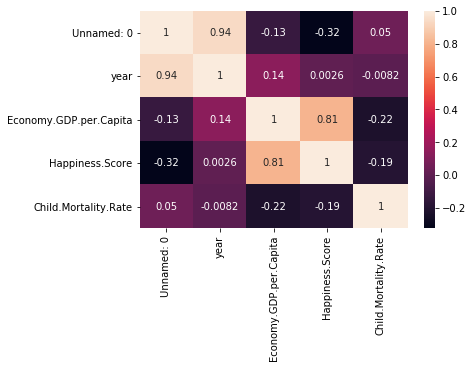

In [36]:
sns.heatmap(MortalityMelt1.corr(), annot=True)

In [45]:
MortalityMelt2 = MortalityMelt1[['year', 'Economy.GDP.per.Capita', 'Happiness.Score', 'Child.Mortality.Rate']]
MortalityMelt2.head()

,year,Economy.GDP.per.Capita,Happiness.Score,Child.Mortality.Rate
0,2015,1.39651,7.587,367
1,2015,1.30232,7.561,10
2,2015,1.32548,7.527,249
3,2015,1.45900,7.522,161
4,2015,1.32629,7.427,2033


In [48]:
MortalityMelt2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,year,Economy.GDP.per.Capita,Happiness.Score,Child.Mortality.Rate
year,1.0,0.14,0.0026,-0.0082
Economy.GDP.per.Capita,0.14,1.0,0.81,-0.22
Happiness.Score,0.0026,0.81,1.0,-0.19
Child.Mortality.Rate,-0.0082,-0.22,-0.19,1.0


#### Lets look at a histogram of happiness

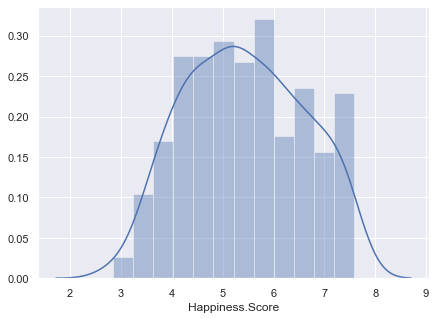

In [37]:
fig = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(MortalityMelt1['Happiness.Score'],bins=12);

#### Here we have something like bimodal distribution. Distribution tails aren't equal- More highly content people than unhappy. 

### How about a histogram of child mortality?

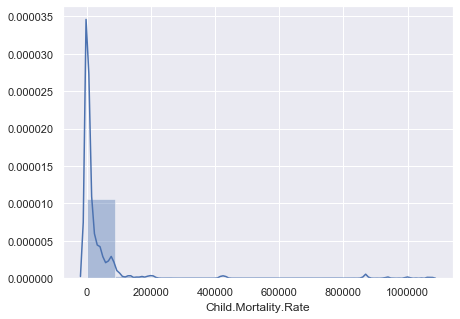

In [43]:
fig = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(MortalityMelt1['Child.Mortality.Rate'],bins=12);

#### Here we have an extreemely positivaly scewed peak with a long low tail to the right. This shows the majority of the child mortality rate being in the 0 to 100,000 rate with a couple tiny bumps/outliers way up in the 900,000 range. 

### How about GDP per capita?

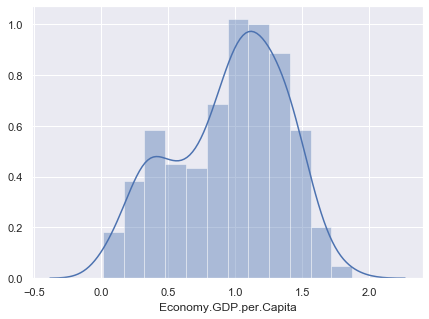

In [44]:
fig = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(MortalityMelt1['Economy.GDP.per.Capita'],bins=12);

#### Here we have a sightly more evenly distributed histogram with the majority of the GDP being higher than lower. 

In [ ]:
HappyMerged1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)